**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [16]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.overlap.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_starrmpra_ranknorm = dat
print(dim(dat))
head(dat)

[1] 1241    6


Peak,ASTARR,WSTARR,TMPRA,LMPRA,Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:32870601-32871324,0.12006446,0.06204674,0.1958098,0.22804190,0.1514907
chr11:32874343-32875070,0.13053989,0.21434327,0.3231265,0.08098308,0.1872482
chr11:32884749-32885822,0.08541499,0.26349718,0.5439162,0.78565673,0.4196213
chr11:32901572-32902485,0.22320709,0.35455278,0.1571313,0.31748590,0.2630943
chr11:32903491-32904506,0.52377115,0.01531023,0.2095085,0.74053183,0.3722804
chr11:32910855-32912010,0.68573731,0.44641418,0.9129734,0.43755036,0.6206688


In [17]:
dat = dat_peak_starrmpra_ranknorm
dat = dat %>% dplyr::arrange(Mean)

VEC_TXT_PEAK  = dat$Peak
VEC_TXT_ASSAY = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
head(dat)

Peak,ASTARR,WSTARR,TMPRA,LMPRA,Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX:48996933-48997220,0.005640612,0.0008058018,0.0008058018,0.07252216,0.01994359
chr20:56703281-56703575,0.002417405,0.1039484287,0.0080580177,0.03223207,0.03666398
chr8:128527915-128528670,0.073327961,0.0032232071,0.0975020145,0.09105560,0.06627720
chr20:56716655-56717126,0.014504432,0.1321514907,0.0233682514,0.12489927,0.07373086
chr11:33818437-33819007,0.145044319,0.0547945205,0.0257856567,0.08501209,0.07765915
chr16:892329-892989,0.022562450,0.1442385173,0.1635777599,0.01208703,0.08561644


In [18]:
dat = dat_peak_starrmpra_ranknorm
dat = dat %>%
    dplyr::select(-Mean) %>%
    tidyr::gather(Assay, Score, -Peak) %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=VEC_TXT_ASSAY),
        Peak  = factor(Peak,  levels=VEC_TXT_PEAK),
    )

dat_score_starrmpra = dat
print(dim(dat))
head(dat)

[1] 4964    3


Peak,Assay,Score
<fct>,<fct>,<dbl>
chr11:32870601-32871324,ASTARR,0.12006446
chr11:32874343-32875070,ASTARR,0.13053989
chr11:32884749-32885822,ASTARR,0.08541499
chr11:32901572-32902485,ASTARR,0.22320709
chr11:32903491-32904506,ASTARR,0.52377115
chr11:32910855-32912010,ASTARR,0.68573731


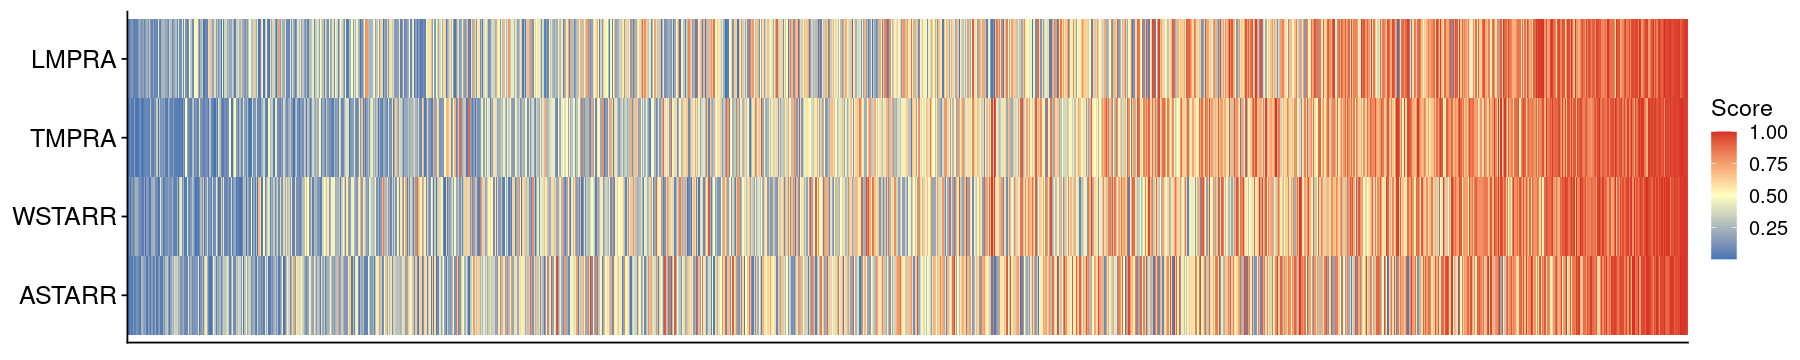

In [19]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    #axis.title.x = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

theme_legend = theme(legend.position = "none")

dat = dat_score_starrmpra

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="Open Chromatin Regions") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)